In [2]:
import numpy as np
import matplotlib.pyplot as plt


from matplotlib import rcParams
params = {'legend.fontsize': '15',
         'axes.labelsize': '17',
         'axes.titlesize':'17',
         'xtick.labelsize':'17',
         'ytick.labelsize':'17',
         'font.family': 'sans-serif',
         'text.usetex': True}
rcParams.update(params)

In [14]:
data = np.load('data_Fig6H.npy', allow_pickle = True).item()

print(data['info'])

Ls1_list = data['L1']
Ls2_list = data['L2']
fraction = data['fraction']

dtsim = 15
nsim = Ls1_list.shape[-1]
tspan = np.linspace(0,dtsim*nsim, nsim)

t1 = 27
t2 = -1

print('\nData considered from:', t1*dtsim)

Ls1_mean = np.mean(np.mean(Ls1_list[:,:,t1:t2], axis = 2), axis = 0)

Ls1_std = np.array((np.std(np.mean(Ls1_list[:,:,t1:t2], axis = 2), axis = 0)))

Ls2_mean = np.mean(np.mean(Ls2_list[:,:,t1:t2], axis = 2), axis = 0)
Ls2_std = np.array((np.std(np.mean(Ls2_list[:,:,t1:t2], axis = 2), axis = 0)))

50 parallel experiments, saved every time = 15, giving 34 time steps. 'fraction' gives (45)-array of fraction of Snail cells. L_i is a (50,45,34)-array with angular momentum for i = 1,2 (1: WT is a global orbiting state, 2: WT is a peripheral orbiting state).

Data considered from: 405


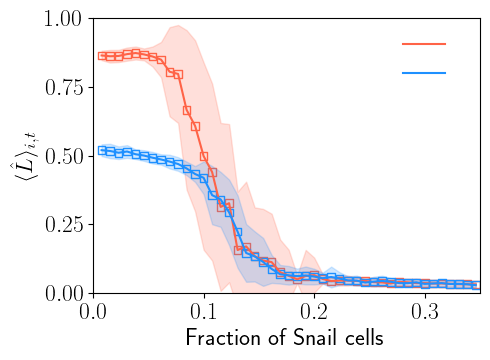

In [15]:
plt.figure(figsize = (5,3.7))
plt.ylim(0,1)
plt.xlim(0,.35)
plt.scatter(fraction, (Ls1_mean), s = 30, marker = 's', color = 'none', edgecolor = 'tomato')
plt.plot(fraction, Ls1_mean, color = 'tomato', label = ' ')
plt.fill_between(fraction, Ls1_mean + Ls1_std, Ls1_mean-Ls1_std, color = 'tomato',alpha = .2)

plt.scatter(fraction, (Ls2_mean), s = 30, marker = 's', color = 'none', edgecolor = 'dodgerblue')
plt.plot(fraction, Ls2_mean, color = 'dodgerblue', label = ' ')
plt.fill_between(fraction, Ls2_mean + Ls2_std, Ls2_mean-Ls2_std, color = 'dodgerblue',alpha = .2)

plt.yticks([0,0.25,0.5,0.75,1])
plt.xlabel('Fraction of Snail cells')
plt.ylabel('$\\langle\hat{L}\\rangle_{i,t}$')
plt.legend(frameon = False)
plt.tight_layout()
#plt.savefig('fig_6h.png',transparent = True, dpi = 1200)
plt.show()